<a href="https://colab.research.google.com/github/saumyasingh18/Olympic-Medal-Count-by-Country/blob/main/Olympic_Medal_Count_by_Country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Olympic Medal Count By Country**

**Objective -** Compare country-wise medal performance across Olympic years.

**Introduction --** The Olympic Games are a global sporting event where nations compete for medals across a wide range of sports. The medal tally provides valuable insights into the sporting dominance of different countries. This project analyzes Olympic medal data to study trends, clean and process datasets, and visualize results such as medal counts, sports-wise dominance, and per capita medal performance.

**Tools and Libraries--**following Python libraries were used in the analysis:

NumPy → For numerical operations.

Pandas → For data manipulation, merging, and analysis.

Matplotlib & Seaborn → For data visualization and creating plots.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset Discription--**

summer.csv - Contains Olympic medal data for Summer Games. Includes columns such as Year, Country, Sport, Event, Medal.

Combined_data.csv -Stores merged Olympic data across different editions. Represents overall medal counts for each country.

Dictionary.csv -Provides additional contextual data such as country population and GDP. Useful for calculating per capita medals.

In [22]:
summer_url="https://raw.github.com/saumyasingh18/Olympic-Medal-Count-by-Country/main/summer.csv"
medal_url="https://raw.github.com/saumyasingh18/Olympic-Medal-Count-by-Country/main/combined_data.csv"
dict_url="https://raw.github.com/saumyasingh18/Olympic-Medal-Count-by-Country/main/dictionary.csv"
summer = pd.read_csv(summer_url)
medal_data = pd.read_csv(medal_url)
dictionary = pd.read_csv(dict_url)

print("Summer shape:", summer.shape)
print("Summer head:\n", summer.head())
print("Medal shape:", medal_data.shape) #To display the size of the data
print("Medal head:\n",medal_data.head()) #To desplay the first few data elements
print("Dictionary shape:", dictionary.shape)
print("Dictionary head:\n", dictionary.head())



Summer shape: (14753, 8)
Summer head:
    Year    City     Sport Discipline Country Gender  \
0  1896  Athens  Aquatics   Swimming     HUN    Men   
1  1896  Athens  Aquatics   Swimming     AUT    Men   
2  1896  Athens  Aquatics   Swimming     GRE    Men   
3  1896  Athens  Aquatics   Swimming     GRE    Men   
4  1896  Athens  Aquatics   Swimming     GRE    Men   

                        Event   Medal  
0              100M Freestyle    Gold  
1              100M Freestyle  Silver  
2  100M Freestyle For Sailors  Bronze  
3  100M Freestyle For Sailors    Gold  
4  100M Freestyle For Sailors  Silver  
Medal shape: (162, 5)
Medal head:
           Team  Combined Gold  Combined Silver  Combined Bronze  \
0  Afghanistan              0                0                2   
1      Albania              0                0                2   
2      Algeria              7                4                9   
3    Argentina             22               27               31   
4      Armenia      

#Data cleaning

The dataset were inspected for duplicate values and inconsistencies.

*   Column names were standardized across datasets
*Duplicate records were removed.
*Merging necessary datasets


Standardizing the column names for a better and easier data handeling. Different datasets had inconsistent column naming conventions. To unify them, all column names were :Converted to lowercase and Replaced spaces with underscores (' ' → '_')

In [23]:
# standardizing columns
summer.columns = summer.columns.str.lower().str.replace(' ', '_')
medal_data.columns = medal_data.columns.str.lower().str.replace(' ', '_')
medal_data.rename(columns={'combined_total': 'total','team': 'country'}, inplace=True)
dictionary.rename(columns={'Country': 'country'}, inplace=True)
print("summer\n",summer.head())
print("\n\nMedal\n",medal_data.head())
print("\n\ndict\n",dictionary.head())

summer
    year    city     sport discipline country gender  \
0  1896  Athens  Aquatics   Swimming     HUN    Men   
1  1896  Athens  Aquatics   Swimming     AUT    Men   
2  1896  Athens  Aquatics   Swimming     GRE    Men   
3  1896  Athens  Aquatics   Swimming     GRE    Men   
4  1896  Athens  Aquatics   Swimming     GRE    Men   

                        event   medal  
0              100M Freestyle    Gold  
1              100M Freestyle  Silver  
2  100M Freestyle For Sailors  Bronze  
3  100M Freestyle For Sailors    Gold  
4  100M Freestyle For Sailors  Silver  


Medal
        country  combined_gold  combined_silver  combined_bronze  total
0  Afghanistan              0                0                2      2
1      Albania              0                0                2      2
2      Algeria              7                4                9     20
3    Argentina             22               27               31     80
4      Armenia              2               11           

The drop_duplicates() method in Pandas is designed to remove duplicate rows from a DataFrame based on all columns or specific ones. By default, it scans the entire DataFrame and retains the first occurrence of each row and removes any duplicates that follow. Subset is used tospecifies the columns to check for duplicates. If not provided all columns are considered.

In [24]:
#Removing duplicate values
print("summer shape before removing duplicates:", summer.shape)
summer = summer.drop_duplicates()
print("summer shape after removing duplicates:", summer.shape)
print("medal_datadata shape before removing duplicates:", medal_data.shape)
medal_data = medal_data.drop_duplicates(subset='country')
print("medal_data shape after removing duplicates:", medal_data.shape)

print("dictionary shape before removing duplicates:", dictionary.shape)
dictionary = dictionary.drop_duplicates(subset='country')
print("dictionary shape after removing duplicates:", dictionary.shape)

summer shape before removing duplicates: (14753, 8)
summer shape after removing duplicates: (14753, 8)
medal_datadata shape before removing duplicates: (162, 5)
medal_data shape after removing duplicates: (162, 5)
dictionary shape before removing duplicates: (201, 4)
dictionary shape after removing duplicates: (201, 4)


Mearging the medal_data dataset and dictonary dataset based on the common column of country name. This is done as we requir total gold medal count from the medal_data.csv file and Population column from the dictionary together for analysing the medals won by a country per capita of that country.

In [25]:
# Mearging Medal data and dictonary data
medal_data = medal_data.merge(dictionary, on="country", how="left")
print(medal_data.head())

       country  combined_gold  combined_silver  combined_bronze  total Code  \
0  Afghanistan              0                0                2      2  AFG   
1      Albania              0                0                2      2  ALB   
2      Algeria              7                4                9     20  ALG   
3    Argentina             22               27               31     80  ARG   
4      Armenia              2               11                9     22  ARM   

   Population  GDP per Capita  
0  32526562.0      594.323081  
1   2889167.0     3945.217582  
2  39666519.0     4206.031232  
3  43416755.0    13431.878340  
4   3017712.0     3489.127690  


#Bar Plot By Year

To analyze medal distribution in a particular Olympic year, the dataset was filtered, here we are analysing for the year 2012.The number of medals each country won in 2012 was calculated.

In [9]:
year_to_plot = 2012

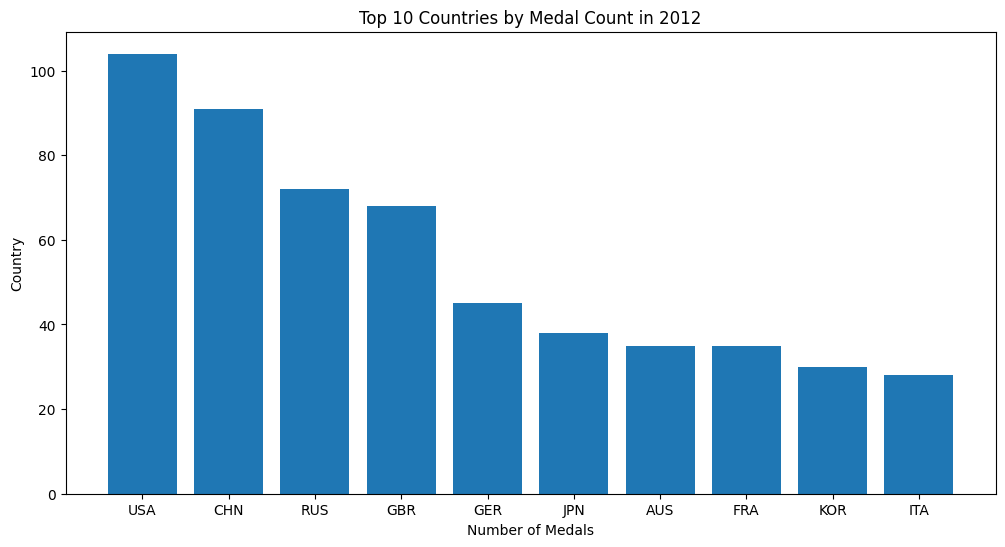

In [10]:
# Filter the summer dataframe for the specified year
medals_in_year = summer[summer['year'] == year_to_plot]

# Group by country and count the number of medals
country_medal_counts_year = medals_in_year.groupby('country').size().reset_index(name='medal_count')

# Sort the countries by medal count in descending order
country_medal_counts_year = country_medal_counts_year.sort_values('medal_count', ascending=False)

# Select the top N countries to display
top_n = 10
top_countries_year = country_medal_counts_year.head(top_n)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_countries_year['country'], top_countries_year['medal_count'])
plt.xlabel('Number of Medals')
plt.ylabel('Country')
plt.title(f'Top {top_n} Countries by Medal Count in {year_to_plot}')
plt.show()

#Medal count by Countary

Here we identifies the top 10 medal-winning countries by sorting the dataset in descending order of total medals. The .head(10) method extracts the first ten rows after sorting. Printing only the country and total columns gives a concise view of the leaders. This step highlights which nations have historically dominated the Olympics, with countries like the USA, Russia, and Britain typically appearing at the top.

In [11]:
medal_sort=medal_data.sort_values('total',ascending=False)
print(medal_sort)
top10=medal_sort.head(10)
print(top10)

            country  combined_gold  combined_silver  combined_bronze  total  \
149   United States           1219             1000              876   3095   
114    Soviet Union            473              376              355   1204   
54    Great Britain            310              344              360   1014   
49          Germany            317              318              320    955   
46           France            280              319              354    953   
..              ...            ...              ...              ...    ...   
131           Sudan              0                1                0      1   
145    Turkmenistan              0                1                0      1   
141           Tonga              0                1                0      1   
140            Togo              0                0                1      1   
154  Virgin Islands              0                1                0      1   

    Code   Population  GDP per Capita  
149  USA  3

Vizulization

A bar plot is created using Seaborn to visually compare the top 10 countries by medal count. The figure size is set to make the chart more readable.Titles and axis labels are added for clarity. This visualization allows for a quick understanding of the medal gap between leading nations—for example, showing the USA’s clear dominance over others.

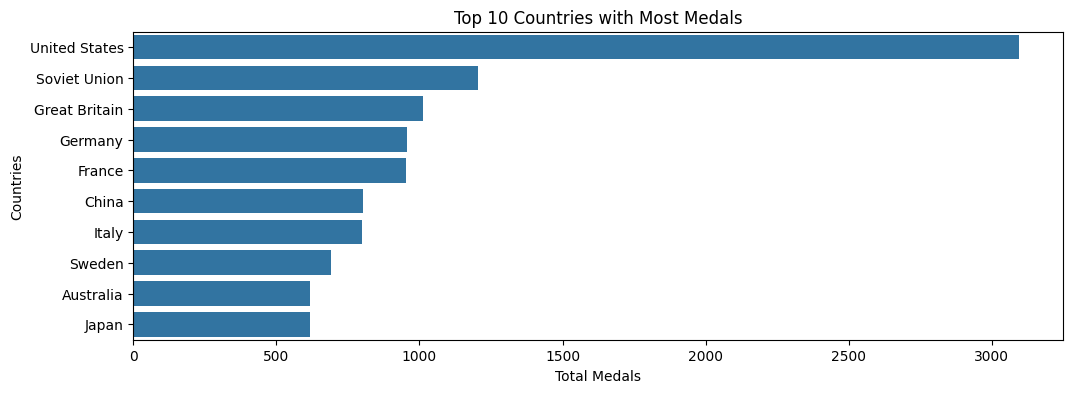

In [12]:
#Representing Top10 medal wining countries using bargraph
plt.figure(figsize=(12,4))
sns.barplot(data=medal_sort.head(10), x="total", y="country")
plt.xlabel('Total Medals')
plt.ylabel('Countries')
plt.title('Top 10 Countries with Most Medals')
plt.show()

#Medals per capita

A new derived column, medals_per_capita, is created by dividing each country’s total medal count by its population. This metric provides a fairer comparison between large and small countries, as raw medal counts favor populous nations. For example, Norway may not have many medals overall but performs exceptionally when adjusted per capita. Printing the first few rows verifies that the new column was added successfully and calculated correctly.

In [13]:
medal_data['medals_per_capita'] = medal_data['total'] / medal_data['Population']
medal_data_sorted = medal_data.sort_values('medals_per_capita', ascending=False)
top10_per_capita = medal_data_sorted.head(10)
print(top10_per_capita)

           country  combined_gold  combined_silver  combined_bronze  total  \
82   Liechtenstein              2                2                6     10   
100         Norway            213              187              176    576   
120     San Marino              0                1                2      3   
45         Finland            146              150              184    480   
133         Sweden            216              232              242    690   
61         Hungary            189              163              188    540   
56         Grenada              1                1                3      5   
134    Switzerland            117              128              137    382   
9          Bahamas              8                2                6     16   
7          Austria             93              123              135    351   

    Code  Population  GDP per Capita  medals_per_capita  
82   LIE     37531.0             NaN           0.000266  
100  NOR   5195921.0    7

visualization of Medals won by county per capita

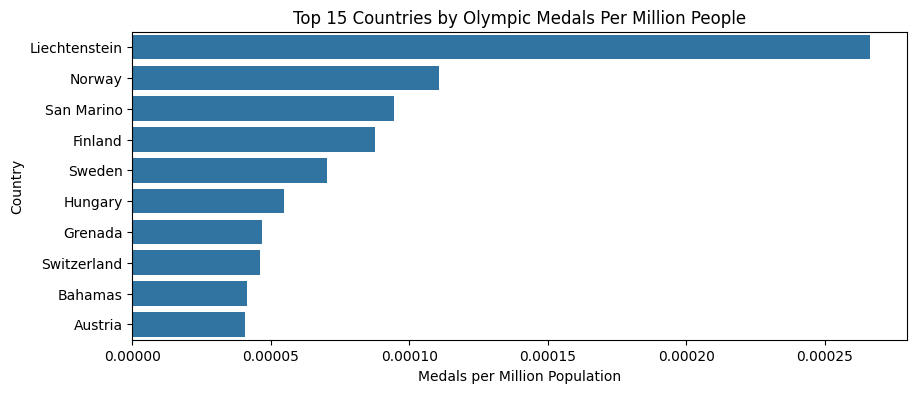

In [14]:
plt.figure(figsize=(10,4))
sns.barplot(x="medals_per_capita", y="country", data=top10_per_capita)
plt.title("Top 15 Countries by Olympic Medals Per Million People")
plt.xlabel("Medals per Million Population")
plt.ylabel("Country")
plt.show()

#Sports wise dominance

To Understand country-wise dominance in different sports, the dataset was grouped by sport and country.size() is used to counted the number of medals for each pair.To highlight country-specific strengths, the analysis zoomed into Wrestling and extracted the top 5 medal-winning countries.

In [15]:
#Counting medals by sports and country
sport_medals = summer.groupby(['sport', 'country']).size().reset_index()
print(sport_medals)
# Finding top 5 countries in Wrestling
top_5_countries = sport_medals[sport_medals['sport'] == 'Wrestling'].nlargest(5, 0)
print(top_5_countries)

          sport country    0
0      Aquatics     ANZ    8
1      Aquatics     ARG    3
2      Aquatics     AUS  193
3      Aquatics     AUT   12
4      Aquatics     BEL   10
...         ...     ...  ...
1086  Wrestling     UKR   14
1087  Wrestling     URS  116
1088  Wrestling     USA  129
1089  Wrestling     UZB    7
1090  Wrestling     YUG   16

[1091 rows x 3 columns]
          sport country    0
1088  Wrestling     USA  129
1087  Wrestling     URS  116
1081  Wrestling     SWE   84
1048  Wrestling     FIN   83
1037  Wrestling     BUL   68


viasualizing top 5 country performance in specific domain



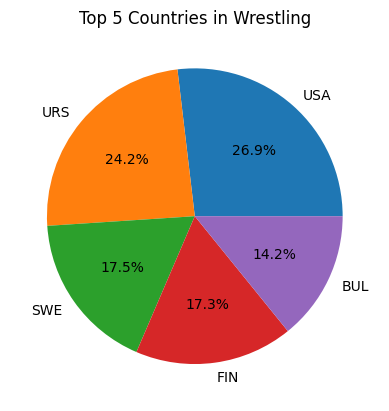

In [16]:
# Representing in pie chart
plt.pie(top_5_countries[0], labels=top_5_countries['country'], autopct='%1.1f%%')
plt.title('Top 5 Countries in Wrestling')
plt.show()

#Analysing a countries performance over the years



We filters the summer dataset for the USA and plots medal counts across years. The lineplot shows how many medals the USA won in each Olympic edition. The visualization highlights growth trends, temporary declines and its dominance in later decades. This analysis provides a perspective of USA’s Olympic performance.

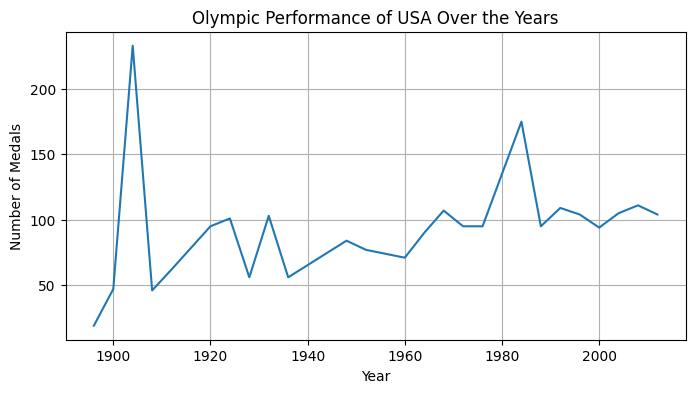

In [17]:
# Select a country to analyze (e.g., 'USA')
cont = 'USA'

# Filter the summer dataframe for the selected country
country_performance = summer[summer['country'] == cont]

# Group by year and count the number of medals
medals_over_years = country_performance.groupby('year').size().reset_index(name='medal_count')

# Plot the performance over the years
plt.figure(figsize=(8, 4))
sns.lineplot(data=medals_over_years, x='year', y='medal_count')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('Olympic Performance of '+cont+' Over the Years')
plt.grid(True)
plt.show()

#Scatter Plot of Population vs Per Capita Medals

This Scatter plot visualization explores the relationship between population and medal efficiency. A scatter plot is used, where each point represents a country. The x-axis is set to logarithmic scale (xscale("log")) because populations vary drastically across countries. The y-axis shows medals per capita, making small but efficient countries (like Jamaica, Hungary) stand out. The hue="country" parameter distinguishes countries with different colors. This chart clearly reveals that population size alone doesn’t guarantee Olympic success.

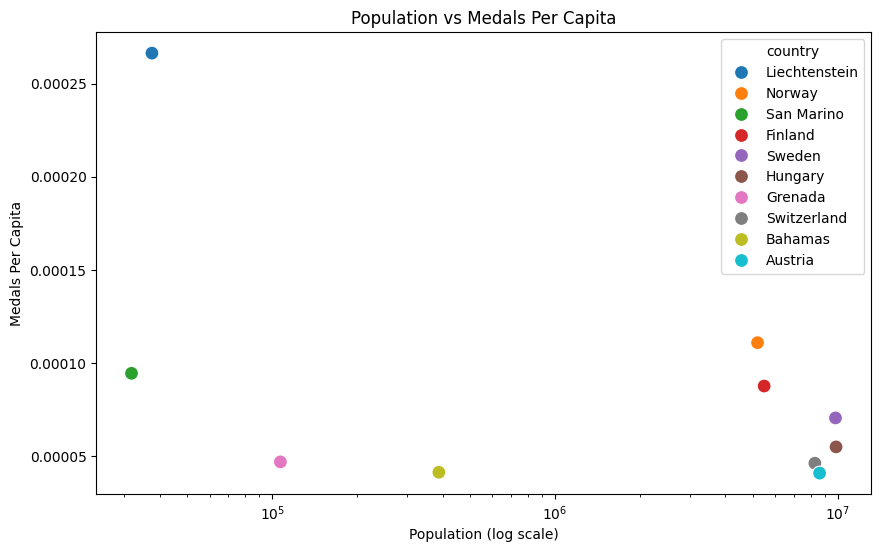

In [18]:
#Scatter plot of population vs medals per capita
plt.figure(figsize=(10,6))
sns.scatterplot(data=top10_per_capita, x="Population", y="medals_per_capita", hue="country", s=100)
plt.xscale("log")
plt.title("Population vs Medals Per Capita")
plt.xlabel("Population (log scale)")
plt.ylabel("Medals Per Capita")
plt.show()
